## Краткий анализ влияния процента семплирования данных на величину ошибки доли посещений мужчин от общего числа посещений
В данной задаче я не подключаюсь напрямую к Hive или HDFS, т.к. не уверен в правах доступа к тестовым папкам.
Поэтому я вывел результаты запросов в файл logs_analysis.csv, который прикладываю к данному блокноту.

### Решение 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
# Чтение данных для анализа из csv
data = pd.read_csv("logs_analysis.csv")

# Запись истинного значения в переменную 
true_val = data.iloc[-1, -1]

# Вычисление отклонения
data['error'] = round((abs(data['overall_males_part'] - true_val) / true_val) * 100, 4)

# Вывод DF
data

,sample_percent,overall_males_part,error
0,0.1,0.6974,0.1148
1,1.0,0.6973,0.1005
2,5.0,0.6970,0.0574
3,10.0,0.6968,0.0287
4,50.0,0.6967,0.0144
5,100.0,0.6966,0.0000


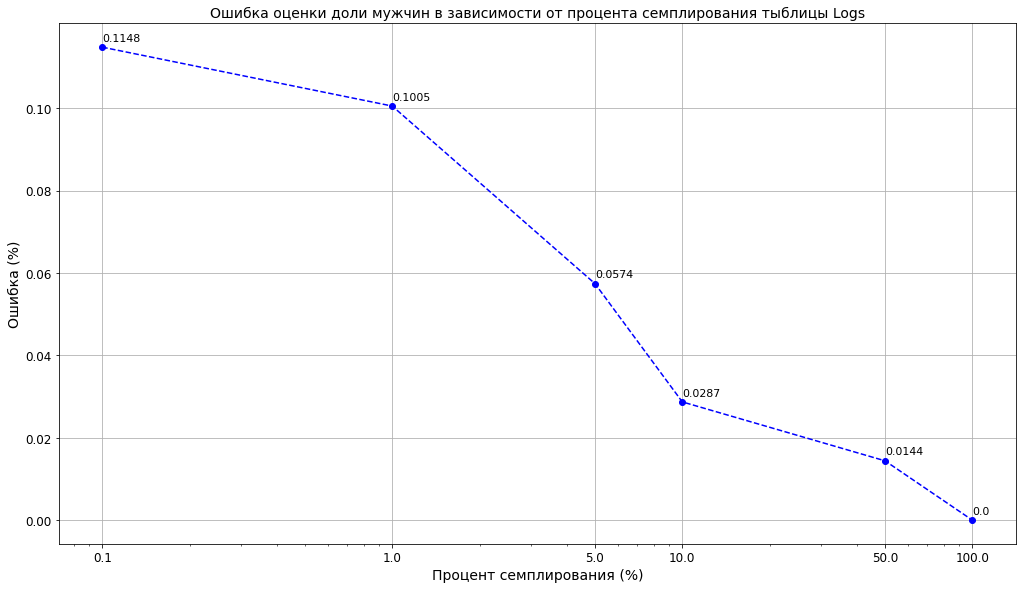

In [7]:
# Построение графика
fig, ax = plt.subplots(figsize=(14, 8))

plt.plot(data['sample_percent'], 
         data['error'], 
         marker='o', 
         linestyle='--', 
         color='b')

plt.title('Ошибка оценки доли мужчин в зависимости от процента семплирования тыблицы Logs', fontsize=14)
plt.grid()
plt.tight_layout()

plt.xscale('log')
plt.xticks(fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().xaxis.set_major_locator(ticker.FixedLocator(data['sample_percent']))
plt.yticks(np.arange(0, 0.12, step=0.02), fontsize=12)

ax.set_axisbelow(True)
ax.set_xlabel('Процент семплирования (%)', fontsize=14)
ax.set_ylabel('Ошибка (%)', fontsize=14)

for i in range(len(data)):
    plt.text(data['sample_percent'].iloc[i], 
             data['error'].iloc[i] + 0.001,
             f'{data["error"].iloc[i]}', 
             ha='left',
             va='bottom',
             fontsize=11)

plt.show()

### Вывод
Согласно графику, увеличение процента семплирования приводит к уменьшению ошибки.
При этом величина отклонения крайне мала даже при низких процентах семплирования (едва превышает 0.1 %).
Отсюда следует, что для анализа рассматриваемого массива данных достаточно низкого процента семплирования (до 10%), 
что позволит ускорить вычисления.